# Data Mining - Notes

Author: Benedict Au, The University of Chicago (M.S. '21) (benau@uchicago.edu)

Get the `jupyterlab-toc` extension to view notebook with table of contents in jupyterlab:  
`jupyter labextension install @jupyterlab/toc` 

## 1. Python Fundementals

To open a file without pandas, use the following:


In [ ]:
import csv
%precision 2
with open('./data/mpg.csv') as f:
    mpg = list(csv.DictReader(f))


In [3]:
import pandas as pd
mpg2 = pd.read_csv("./data/mpg.csv")

To sort a list of lists, use `.sort(key=lambda x: x[0])`, where `x[i]` represents the i-th column.

Learn more about `%lsmagic`, IPython's 'magic' functions.

### Missing Values

Drop rows with missing value from column using `.dropna(axis=0, subset=[col], inplace=True)`.  

Fill NAs with `.fillna(value=0, axis=0, inplace=True)`

In [ ]:
#### Imputing missing values 

### Categorical Values

Declare pandas column as categorical using `.astype('category')`

### Datetime

Xreating a `DateTime` value employs the Python [`strftime`][pst] string
date/time representation. This representation does not allow values
higher than 23 for an hour, hence we have to modify our data. For this
demonstration, we will simply subtract one minute. In a production
system, you might instead convert the `DateTime` to the next day.

In [10]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

filename = './data/flights.csv'
usethis = (1, 2, 4, 14, 15, 16, 17, 18)
column_names = ['Month', 'Day', 'dTime', 'aDelay', 'dDelay', 'Depart', 'Arrive', 'Distance']

data = pd.read_csv(filename, header=0, na_values=['NA'], usecols=usethis, names=column_names)
data.dropna(axis=0, subset=['dTime'], inplace=True)
alldata.fillna(value=0, axis=0, inplace=True)
data.describe()



,Month,Day,dTime,aDelay,dDelay,Distance
count,5.736582e+06,5.736582e+06,5.736582e+06,5.723673e+06,5.736582e+06,5.736582e+06
mean,6.291336e+00,1.571203e+01,1.348705e+03,5.528249e+00,8.154837e+00,7.356117e+02
std,3.381300e+00,8.827161e+00,4.826860e+02,3.142929e+01,2.834847e+01,5.749639e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.116000e+03,-2.040000e+02,2.100000e+01
25%,3.000000e+00,8.000000e+00,9.300000e+02,-9.000000e+00,-3.000000e+00,3.140000e+02
50%,6.000000e+00,1.600000e+01,1.333000e+03,-2.000000e+00,0.000000e+00,5.760000e+02
75%,9.000000e+00,2.300000e+01,1.740000e+03,1.000000e+01,6.000000e+00,9.840000e+02
max,1.200000e+01,3.100000e+01,2.400000e+03,1.688000e+03,1.692000e+03,4.962000e+03


In [11]:
newdata = alldata[['aDelay', 'dDelay', 'Distance']]

# Now copy over the departure and Arrival columns, but change data type to categoricals. 
newdata['Depart'] = alldata['Depart'].astype('category')
newdata['Arrive'] = alldata['Arrive'].astype('category')

# Date-time
newdata['Year'] = 2001
newdata['Month'] = alldata.Month
newdata['Day'] = alldata.Day
newdata['Hour'] = (alldata.dTime/100.).astype(int)
newdata['Min'] = (alldata.dTime - 100*(alldata.dTime/100.).astype(int)).astype(int)

newdata.loc[newdata.Hour == 24, 'Min'] = 59
newdata.loc[newdata.Hour == 24, 'Hour'] = 23

newdata['DTI'] = pd.to_datetime(newdata.Year * 100000000 + 
                                newdata.Month * 1000000 + 
                                newdata.Day * 10000 + 
                                newdata.Hour * 100 + 
                                newdata.Min, format="%Y%m%d%H%M")
newdata.set_index('DTI', inplace=True)
newdata.tail()

,aDelay,dDelay,Distance,Depart,Arrive,Year,Month,Day,Hour,Min
DTI,,,,,,,,,,
2001-12-14 07:04:00,4.0,4.0,1189,ONT,DFW,2001,12,14,7,4
2001-12-15 07:08:00,3.0,8.0,1189,ONT,DFW,2001,12,15,7,8
2001-12-16 06:56:00,-8.0,-4.0,1189,ONT,DFW,2001,12,16,6,56
2001-12-17 06:56:00,-4.0,-4.0,1189,ONT,DFW,2001,12,17,6,56
2001-12-18 07:09:00,3.0,9.0,1189,ONT,DFW,2001,12,18,7,9


## 2. Exploratory Data Analysis: Seaborn

Ref: http://seaborn.pydata.org/tutorial

### 2.1 Visualizing statistical relationships

In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True, style="darkgrid")

#### Relating variables with scatter plots

`relplot()` is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions. 

In [25]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


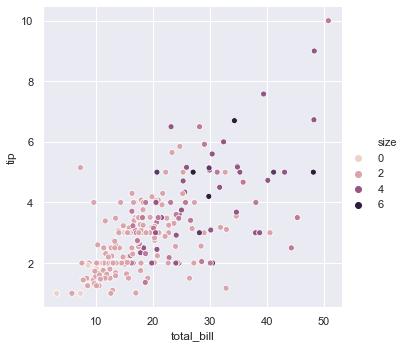

In [30]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

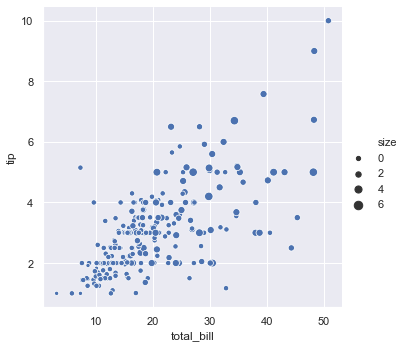

In [31]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

#### Emphasizing continuity with line plots

Understand changes in a continuous variable with `sns.relplot(..., kind="line")`.

Because `lineplot()` assumes that you are most often trying to draw $y$ as a function of $x$, the default behavior is to sort the data by the x values before plotting. However, this can be disabled with `sort=False`.


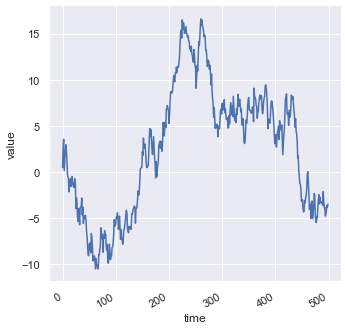

In [32]:
ts = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))

g = sns.relplot(x="time", y="value", kind="line", data=ts)
g.fig.autofmt_xdate()

#### Aggregation and representing uncertainty

More complex datasets will have multiple measurements for the same value of the $x$ variable. The default behavior in seaborn is to aggregate the multiple measurements at each $x$ value by plotting the mean and the $95\%$ C.I. around the mean:

In [43]:
fmri = sns.load_dataset("fmri")
fmri.sort_values(["timepoint", "subject", "event", "region"]).head(8)

,subject,timepoint,event,region,signal
932,s0,0,cue,frontal,0.007766
1063,s0,0,cue,parietal,-0.006899
67,s0,0,stim,frontal,-0.021452
521,s0,0,stim,parietal,-0.039327
707,s1,0,cue,frontal,-0.040937
706,s1,0,cue,parietal,-0.057706
284,s1,0,stim,frontal,-0.046049
84,s1,0,stim,parietal,-0.064454


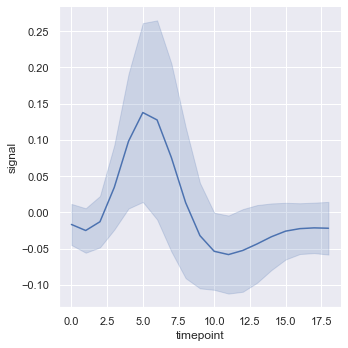

In [47]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

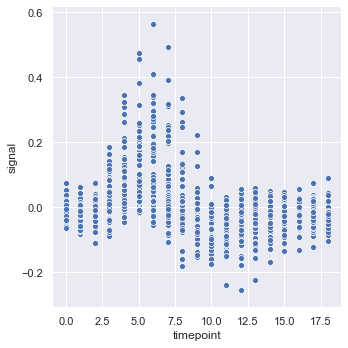

In [49]:
sns.relplot(x="timepoint", y="signal", data=fmri);

The `lineplot()` function has the same flexibility as scatterplot(): it can show up to three additional variables by modifying the hue, size, and style of the plot elements. 

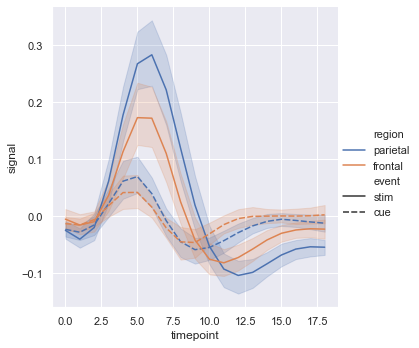

In [50]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

#### Plotting with date data

Line plots pass the data down in their original format to the underlying matplotlib functions, and so they can take advantage of matplotlib’s ability to format dates in tick labels: `.autofmt_xdate()`. But all of that formatting will have to take place at the matplotlib layer:

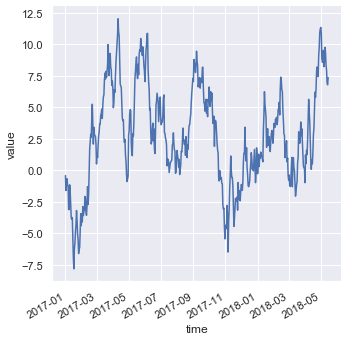

In [54]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

#### Showing multiple relationships with facets

To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

In [57]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


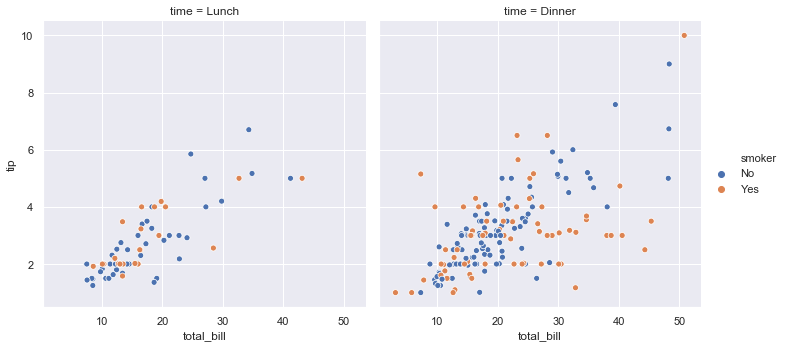

In [55]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

As you start adding more variables to the grid, you may want to decrease the figure size with `height=__`. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

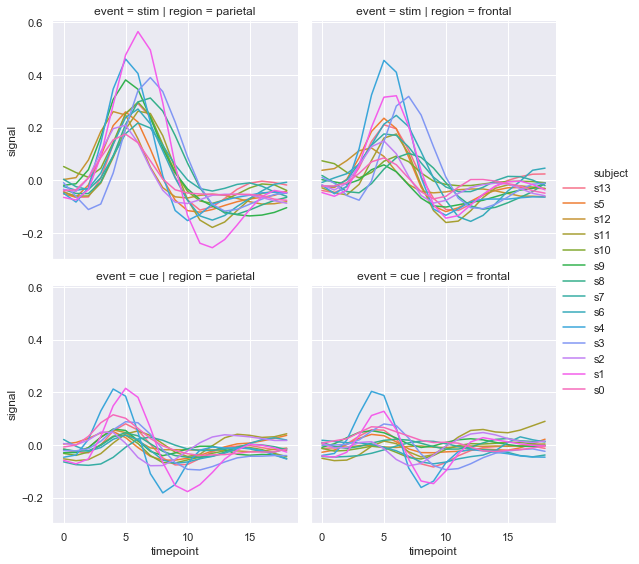

In [60]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=4,
            kind="line", estimator=None, data=fmri);

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows using `col=__, col_wrap=__`

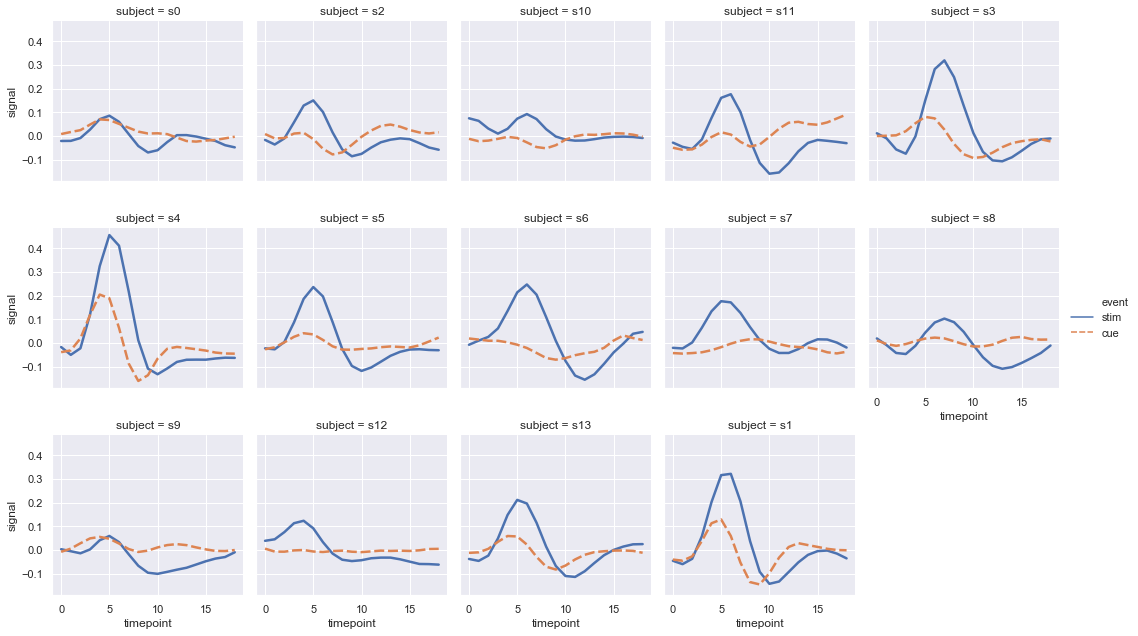

In [63]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=1, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

### 2.2 Plotting with categorical data

It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

Categorical scatterplots:
- `stripplot()` (with kind="strip"; the default)
- `swarmplot()` (with kind="swarm")

Categorical distribution plots:
- `boxplot()` (with kind="box")
- `violinplot()` (with kind="violin")
- `boxenplot()` (with kind="boxen")

Categorical estimate plots:
- `pointplot()` (with kind="point")
- `barplot()` (with kind="bar")
- `countplot()` (with kind="count")

In [64]:
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Categorical scatterplots

`sns.catplot(..., jitter=True)`: Strip plot

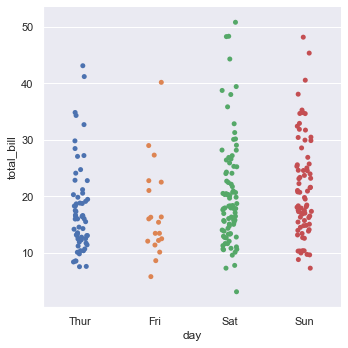

In [65]:
sns.catplot(x="day", y="total_bill", jitter=True, data=tips);

`sns.catplot(..., kind="swarm")`: Swarm plot

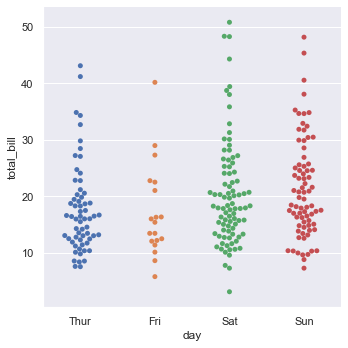

In [66]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

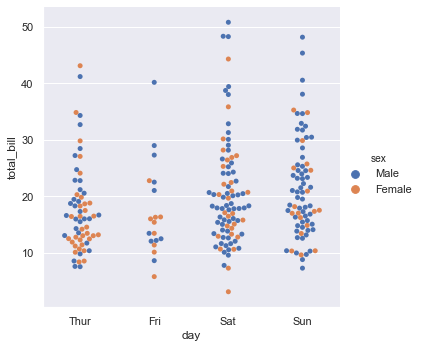

In [67]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

Of course you can swap `x` and `y` to make a horizontal plot:

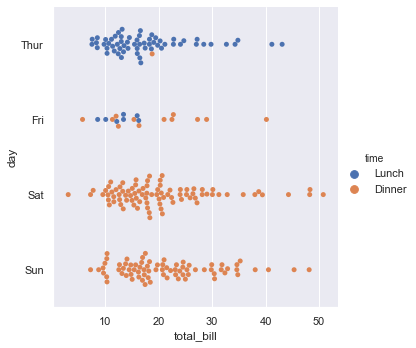

In [72]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

You can ignore specific categories by `query()`-ing the data with conditonals:

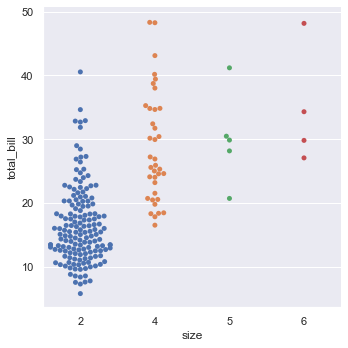

In [70]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != [1,3]"));

Or specify the order in which the categories are plotted:

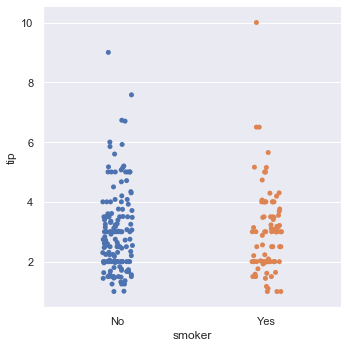

In [71]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

#### Distributions of observations within categories

`sns.catplot(kind="box")`: Boxplots

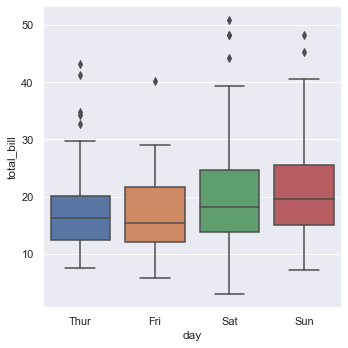

In [74]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

When adding a `hue` semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap:

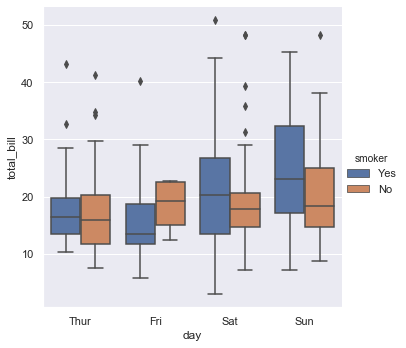

In [75]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

`sns.catplot(kind="violin")`: Violinplots

A different approach is a violinplot(), which combines a boxplot with KDE. It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:


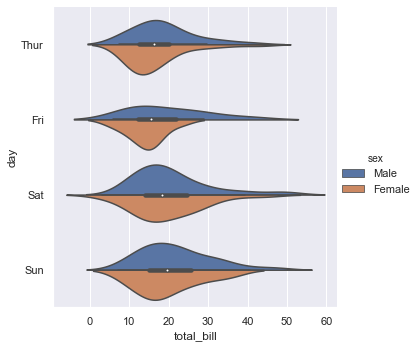

In [77]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", split=True, data=tips);

It can also be useful to combine `swarmplot()` or `striplot()` with a `box plot` or `violin plot` to show each observation along with a summary of the distribution. Within the swarm plot, include `ax=g.ax` so that the swarm secondary plot uses the same axes as the violin primary plot.

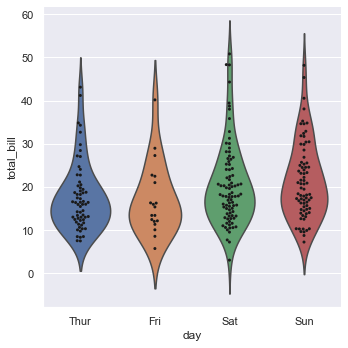

In [86]:
# violin plot
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
# swarm plot
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

#### Statistical estimation within categories

`sns.catplot(kind="bar")`: Barplot


In [88]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars.

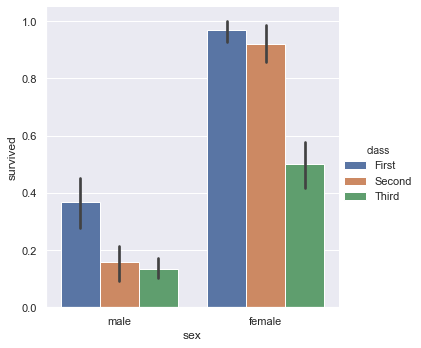

In [89]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

`sns.catplot(kind="point")`: Pointplot

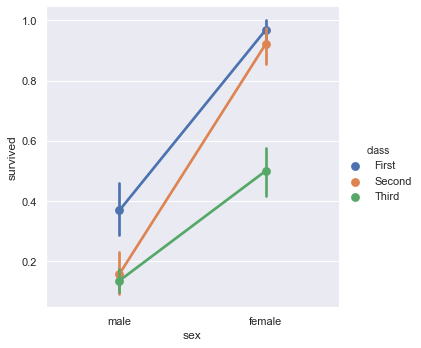

In [90]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

While the categorical functions lack the style semantic of the relational functions, it can still be a good idea to vary the marker and/or linestyle along with the hue to make figures that are maximally accessible and reproduce well in black and white:

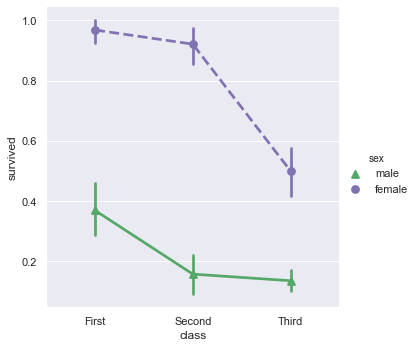

In [91]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);


### 2.3 Examining univariate distributions

#### Visualizing the distribution of a dataset

`sns.distplot()` by default draws a histogram and fits a kernel density estimate (KDE):

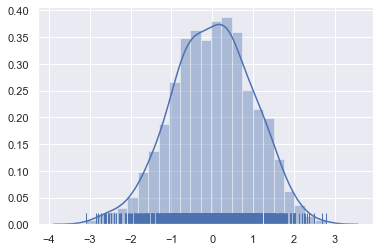

In [32]:
x = np.random.normal(size=1000)
                     
sns.distplot(x, kde=True, rug=True);

Also can fit to parametric distributions:

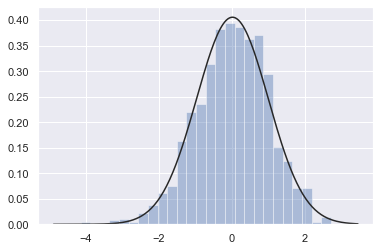

In [182]:
sns.distplot(x, kde=False, fit=stats.norm);

Just plot the KDE:

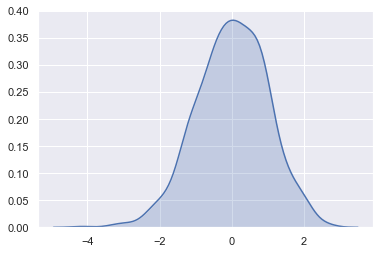

In [183]:
sns.kdeplot(x, shade=True);

#### Plotting bivariate distributions

In [36]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]

x, y = np.random.multivariate_normal(mean, cov, 1000).T

`sns.jointplot()`

Add a regression line by calling `kind='reg'`.

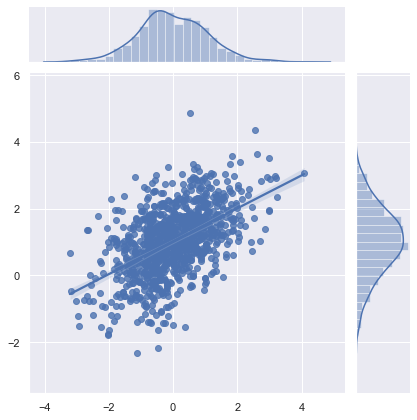

In [40]:
sns.jointplot(x, y, kind='reg');

`sns.jointplot(..., kind="hex", )`

A bivariate analogue of a histogram is known as a `hexbin` plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It’s available through in matplotlib as matplotlib.axes.Axes.hexbin() and as a style in jointplot(). It looks best with a white background:

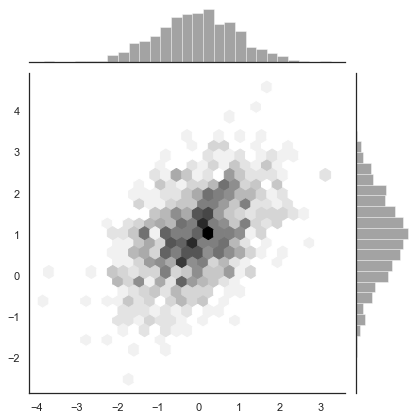

In [188]:
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

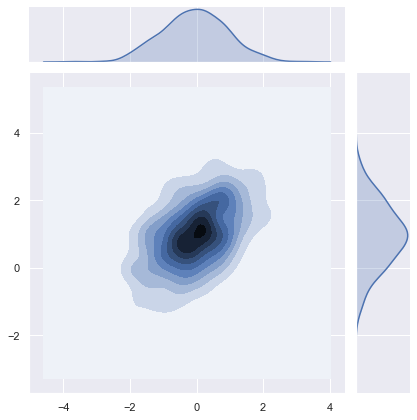

In [189]:
sns.jointplot(x, y,kind="kde");

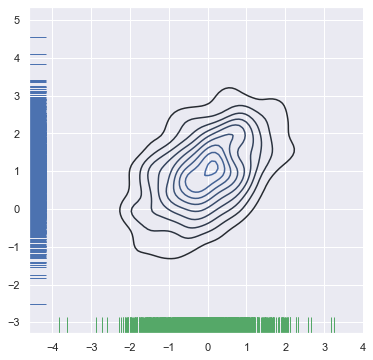

In [192]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(x, y, ax=ax)
sns.rugplot(x, color="g", ax=ax)
sns.rugplot(y, vertical=True, ax=ax);

#### Visualizing pairwise relationships in a dataset

`sns.pairplot()` creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal axes:

(44, 6)


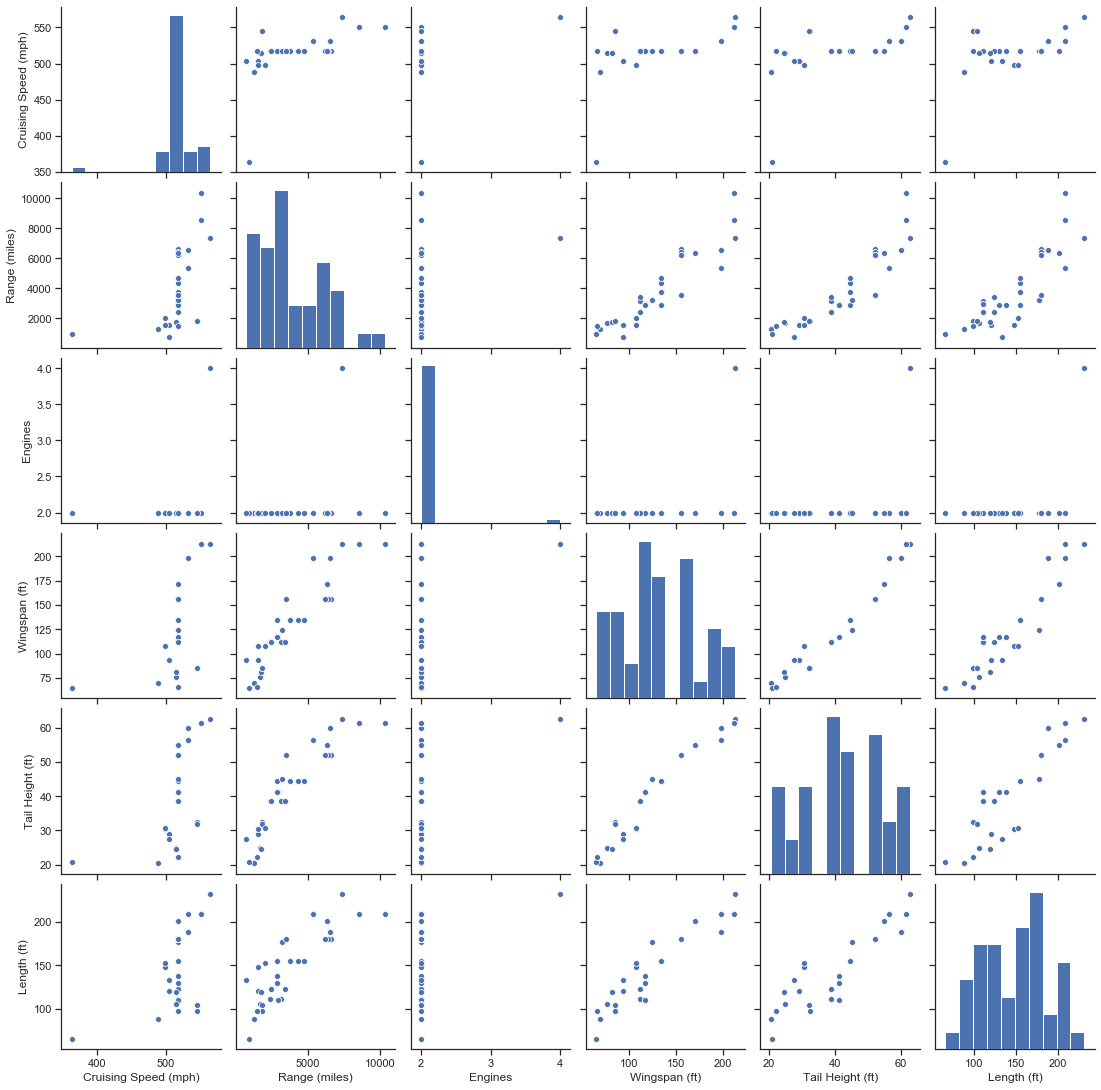

In [24]:
delta = pd.read_csv('./data/delta.csv', index_col='Aircraft')
df = delta[['Cruising Speed (mph)', 'Range (miles)', 'Engines','Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)']]
print(df.shape)

sns.pairplot(df);

In contrast to the sns.pairplot function, `sns.PairGrid()` is a class which means that it does not automatically fill in the plots for us. Instead, we create a class instance and then we map specific functions to the different sections of the grid. 


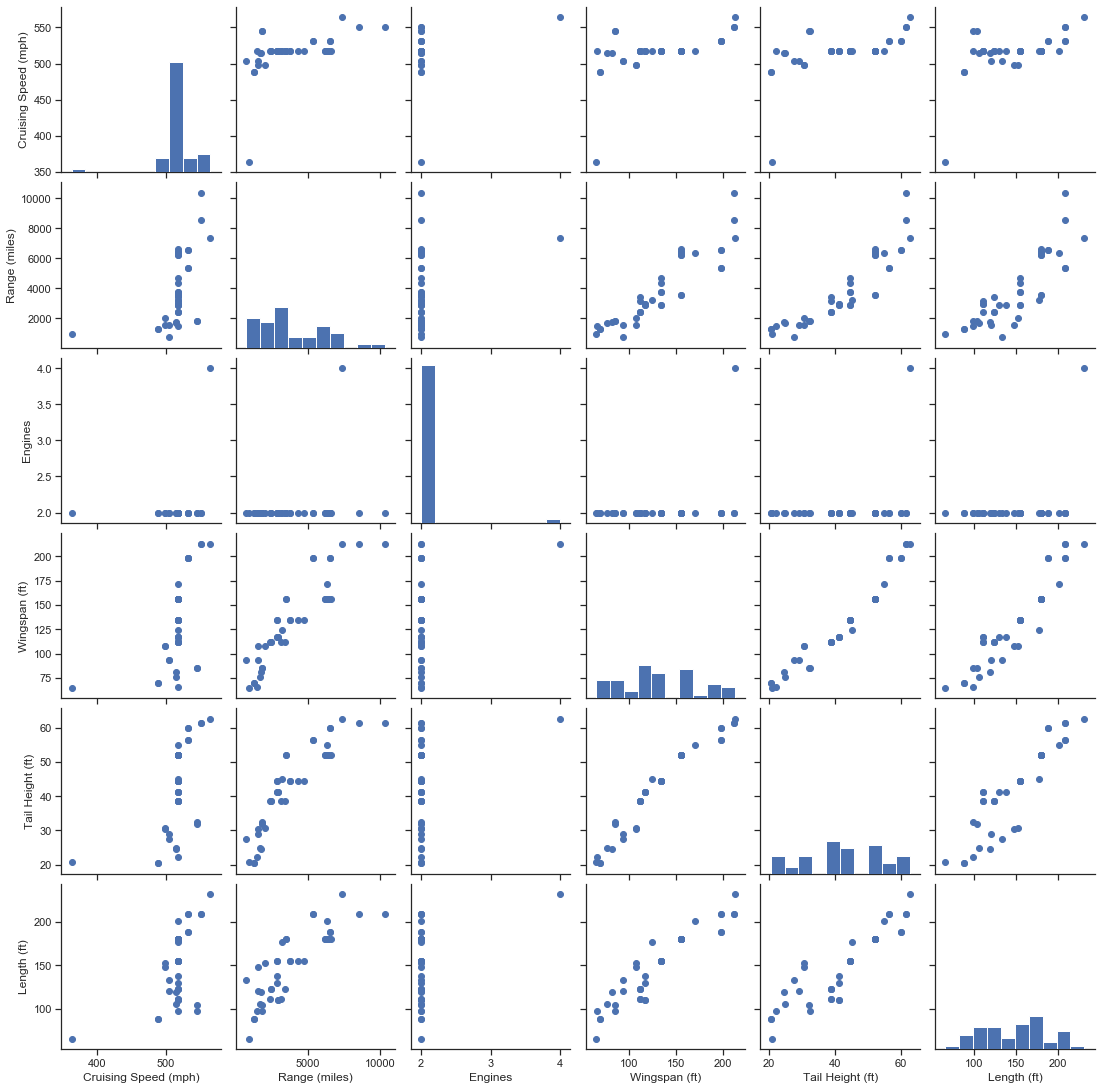

In [26]:
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

You can pairplot and visualise the clusters by parsing the option `hue = clusters`, where `clusters` are the predicted clusters from `KMeans().fit_predict()`.

Specifying the `hue` parameter automatically changes the histograms to KDE plots to facilitate comparisons between multiple distributions.



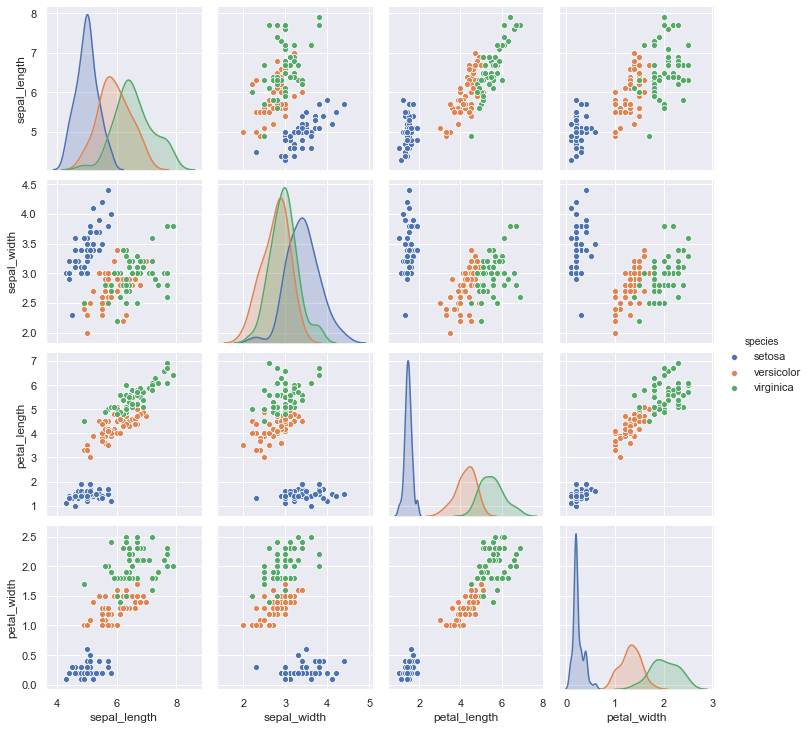

In [18]:
iris = sns.load_dataset("iris")

sns.pairplot(iris, hue="species");

### 2.4 Visualizing linear relationships

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. 

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

#### Functions to draw linear regression models

In [3]:
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Functions to draw linear regression models

Two main functions in seaborn, `regplot()` and `lmplot()`, are used to visualize a linear relationship as determined through regression. In the simplest invocation, both functions draw a scatterplot of two variables, $x$ and $y$, and then fit the regression model $y = X\beta$ and plot the resulting regression line and a $95\%$ confidence interval for that regression.

- `regplot()` accepts the $x$ and $y$ variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data
- `lmplot()` has data as a required parameter and the x and y variables must be specified as strings



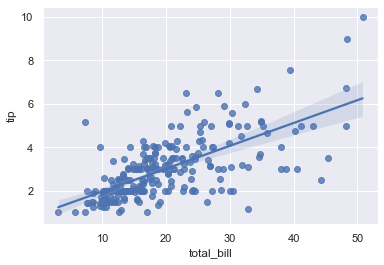

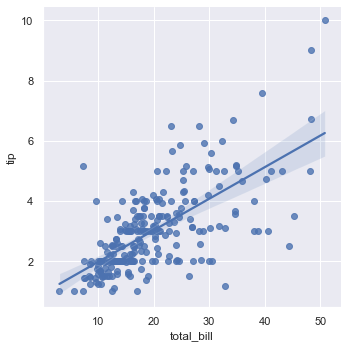

In [4]:
sns.regplot(x="total_bill", y="tip", data=tips);
sns.lmplot(x="total_bill", y="tip", data=tips);


The `lmplot()` method works for discrete support as well, but use `x_jitter=0.05` to make values more clear:

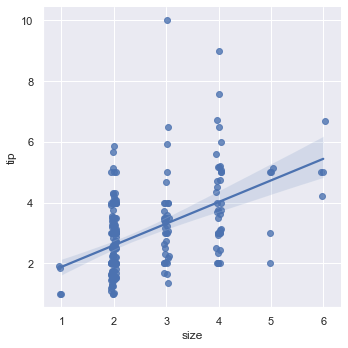

In [5]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

#### Fitting different kinds of models

Sometimes linear trend lines are not the best solution. 

Fitting polynomials using `order=2`:

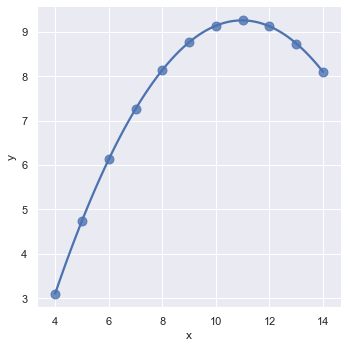

In [8]:
anscombe = sns.load_dataset("anscombe")

sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

Fitting robust regression using `robust=True`, which uses a different loss function to downweight relatively large residuals:

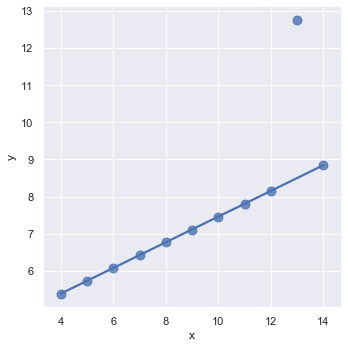

In [10]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

If $y$ is binary, then we use `logistic=True`:

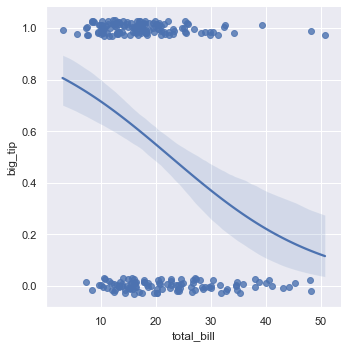

In [12]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15

sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

Can also fit non-parametric reg using a lowess smoother: `lowess=True`

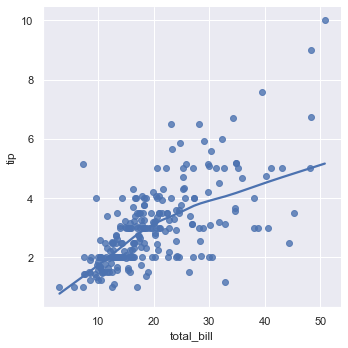

In [13]:
sns.lmplot(x="total_bill", y="tip", data=tips, lowess=True);

Quickly plot residuals using `sns.residplot()`:

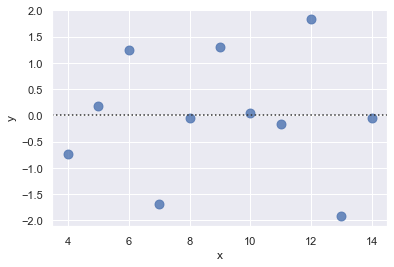

In [15]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

#### Conditioning on other variables

While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to _three_ additional categorical variables.

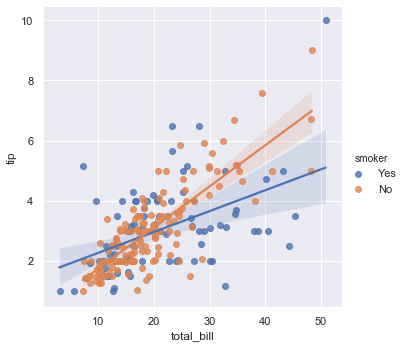

In [16]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

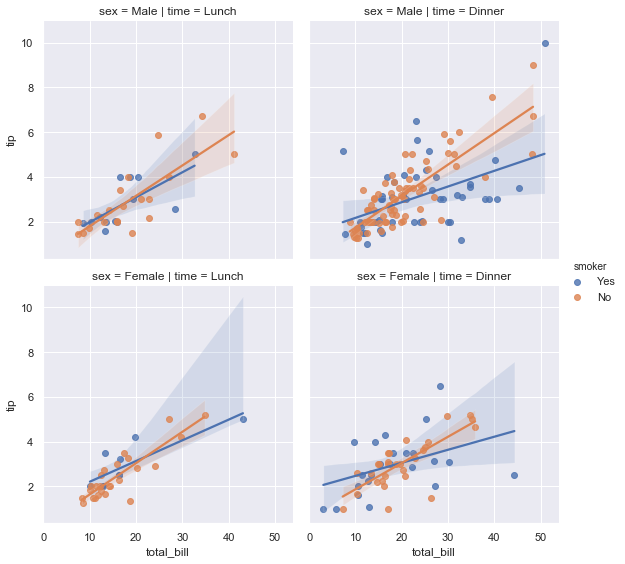

In [18]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", height=4, data=tips);

#### Controlling the size and shape of the plot

`regplot()` is an “axes-level” function draws onto a specific axes. This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. If no axes object is explicitly provided, it simply uses the “currently active” axes, which is why the default plot has the same size and shape as most other matplotlib functions. To control the size, you need to create a figure object yourself.

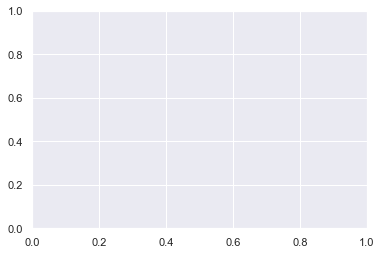

In [25]:
f, ax = plt.subplots(figsize=(6, 4))
# sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

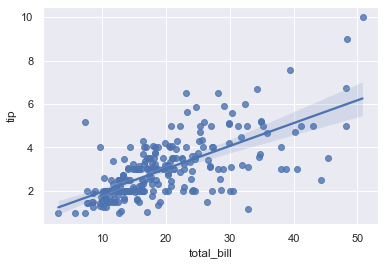

In [26]:
f, ax = plt.subplots(figsize=(6, 4))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

In contrast, the size and shape of the `lmplot()` figure is controlled through the `FacetGrid` interface using the `height` and `aspect` parameters, which apply to each facet in the plot, not to the overall figure itself:

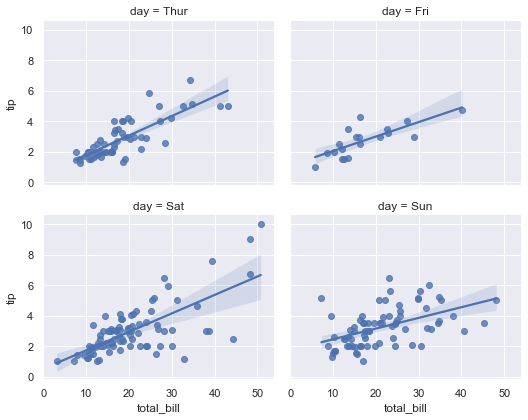

In [29]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3, aspect=5/4);

### 2.5 Building structured multi-plot grids

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")


#### Conditional small multiples

A FacetGrid can be drawn with up to three dimensions: row, col, and hue. These dimensions mat to variables that are categorical or discrete. Additionally, each of `relplot()`, `catplot()`, and `lmplot()` use this object internally, and they return the object when they are finished so that it can be used for further tweaking.

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


This is the format:

The size of the figure is set by providing the height of each facet, along with the aspect ratio.

Initializing the grid like this sets up the matplotlib figure and axes, but doesn’t draw anything on them.

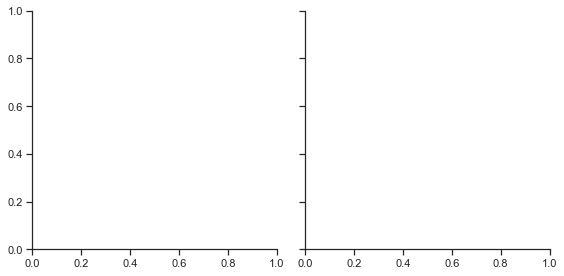

In [17]:
g = sns.FacetGrid(tips, col="time", height=4, aspect=1)

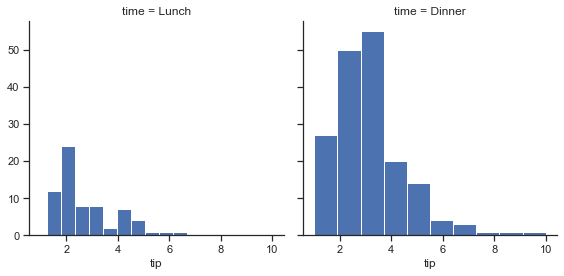

In [18]:
g = sns.FacetGrid(tips, col="time", height=4, aspect=1)
g.map(plt.hist, "tip");

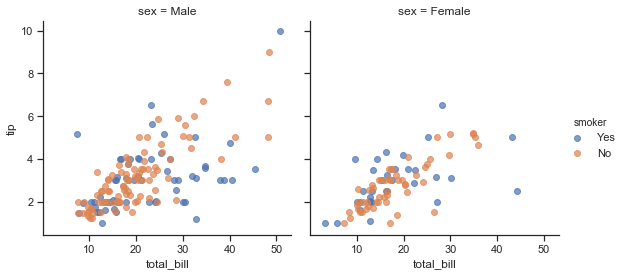

In [19]:
g = sns.FacetGrid(tips, col="sex", hue="smoker", height=4, aspect=1)
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();


#### Plotting pairwise data relationships

Similar to the previous example with the Delta dataset, we can do the same with the Iris dataset, and use `hue` to specify conditional plot:

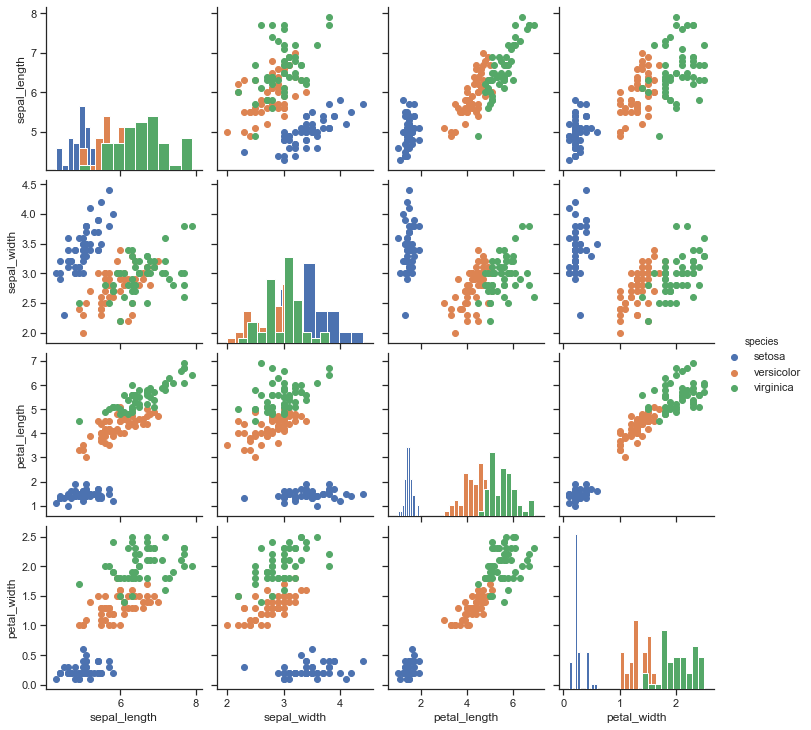

In [28]:
iris = sns.load_dataset("iris")

g = sns.PairGrid(iris, vars=None, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

You can also plot specific multiple $x$'s against the same $y$: 

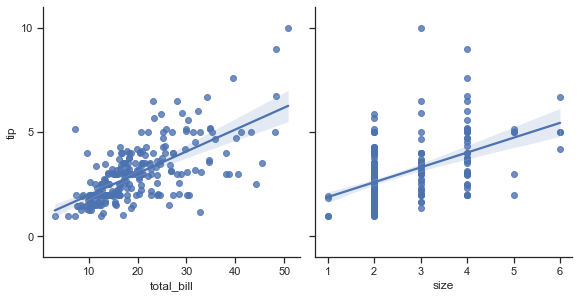

In [33]:
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], height=4)
g.map(sns.regplot)
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);

### 2.6 Controlling figure aesthetics

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

To switch from matplotlib defaults to seaborn defaults, explicitly call `sns.set`.

Seaborn splits matplotlib parameters into two independent groups:

1. sets the aesthetic style of the plot
2. scales various elements of the figure

The interface for manipulating these parameters are two pairs of functions. 
- To *control* the style, use the `sns.axes_style()` and `sns.set_style()` functions
- To *scale* the plot, use the `sns.plotting_context()` and `sns.set_context()` functions

In both cases, the first function returns a dictionary of parameters and the second sets the matplotlib defaults.

Reset default Seaborn parameters again by using `sns.set()`.

#### Seaborn figure styles

There are five preset seaborn themes: 
- darkgrid
- whitegrid
- dark
- white
- ticks 

The default theme is darkgrid. 

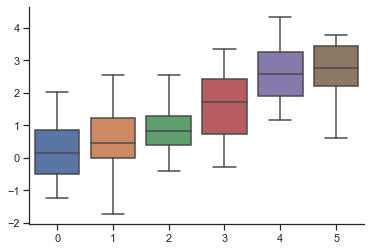

In [44]:
sns.set_style("ticks")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)
sns.despine()

#### Temporarily setting figure style

use the `sns.axes_style()` function in a with statement to temporarily set plot parameters. This also allows you to make figures with differently-styled axes:

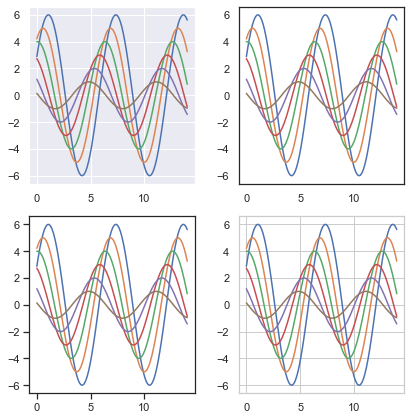

In [45]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sinplot()

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sinplot()

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    sinplot()

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot()

f.tight_layout()

#### Scaling plot elements

There are four preset contexts, in order of relative size, are:
- paper
- notebook
- talk
- poster

The notebook style is the default.

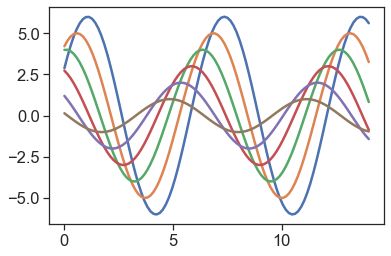

In [47]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

## 3. ML toolkit

### 3.1 Crosstab()

Use `pd.crosstab()` to see which predicted label corresponds to which category. Crosstab a vector of predicted labels/class with a vector of facts:


In [ ]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(df)
df = pd.DataFrame({'labels': labels, 'Varieties': varieties})
pd.crosstab(labels, varieties)

If labels are unknown, then measuring clustering quality by
- Using only samples and their cluster labels
- A good clustering has tight clusters
- Samples in each cluster bunched together


### 3.2 Pipelines

For many data mining problems, it is important first standardise or normalise the data first, then perform any clustering or ML steps. The use of a pipeline allows cleaner execution:


In [ ]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

# Create objects to put into pipeline
scaler = StandardScaler()
## normaliser = normalize()
kmeans = KMeans(n_clusters=4)

# Then create pipeline
pipeline = make_pipeline(scaler, kmeans)

### 3.3 Feature Scaling and Normalization

There are plenty of ways to transform and scale data. 

- Standardisation: for each column/feature, $x_{i, std} = \dfrac{x_i-\mu_i}{\sigma_i}$. In clustering analyses and PCA, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance. Standardisation and scaling changes the covariance matrix, but not for mean centering, since covariance is not affected by linear transformations. 

- Min-max scaling: for each column/feature, $x_{i, norm} = \dfrac{x_i-x_{i, min}}{x_{i, range}}$. The data is scaled to a fixed range, $[0,1]$. The cost of having this bounded range, in contrast to standardization, is that we will end up with smaller standard deviations, which can suppress the effect of outliers. A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.

- Normaliser: for each **row/sample**, $x_{n, norm} = \dfrac{x_n}{norm(x_n)}$

Standardisation vs Normalisation: Normalizer acts row-wise and StandardScaler column-wise. Normalizer does not remove the mean and scale by deviation but scales the whole row to unit norm.

Other methods include MaxAbsScaler(), RobustScaler(), QuantileTransformer-Normal, QuantileTransformer-Uniform, and PowerTransformer-Yeo-Johnson, etc. 

### 3.4 Balanced data

`pd.series.value_counts(dropna=False)` returns a series containing counts of unique value, including a count of NaN's. Datasets are balanced unless it's something like mortality data in clinical malpractice. 

### 3.5 Kernel Density Estimation

KDE is a non-parametric way of estimating PDF. $\forall x_i$, we place a kernal function $K$. The kernal density estimate is

$$\hat{f}_h (x) = \dfrac{1}{hN} \sum\limits_N K\left(\dfrac{x-x_i}{h}\right)$$

where $h>0$ is the smoothing parameter called the *bandwidth*. The choice of $h$ is a trade-off between the bias and the variance of the estimator $\hat(f)$.

Silverman's rule of thumb for the choice of $h$ is given as 

$$h = 0.9 n^{-0.2} \min\left(\hat{\sigma}\,, 0.746268\,\text{IQR} \right) $$

In [105]:
#% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific pandas warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

#### Univariate KDE

We use the Iris dataset as an example. Firstly, let's examine one dimensional data: `SepalLengthCm`

In [109]:
dataset = pd.read_csv('./data/Iris.csv')

dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


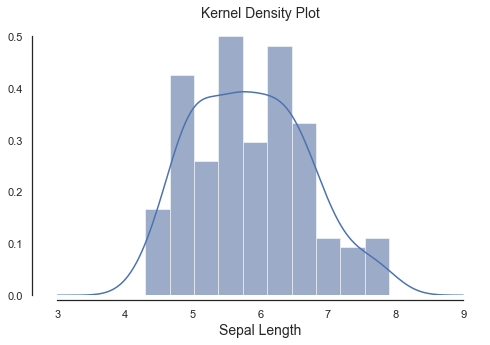

In [112]:
from sklearn.neighbors import KernelDensity

x = dataset['SepalLengthCm']
bw = 1.06 * x.std() * len(x) ** (-1 / 5.) # an alternative to Silverman's RofT
kde = KernelDensity(kernel='gaussian', bandwidth=bw)
support = np.linspace(3, 9, len(x))


# Create the KDE, and return the support values.
kde.fit(x[:, np.newaxis])
y = kde.score_samples(support[:, np.newaxis])

# Plot the results including underlying histogram
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=10, alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True)
ax.plot(support, np.exp(y))
plt.xlabel('Sepal Length', fontsize=14)
plt.title('Kernel Density Plot', fontsize=14)

sns.despine(offset=5, trim=True)
plt.show()

To sample from the KDE:

In [114]:
kde.sample(n_samples=5)

array([[4.9635394 ],
       [6.11195559],
       [4.52666398],
       [6.9358787 ],
       [5.49895389]])

In [117]:
[item for sublist in kde.sample(n_samples=5) for item in sublist]

[4.338838887156402,
 6.097100005971423,
 5.935356446294655,
 5.421467782207298,
 5.906057732285718]

#### Multi-variate KDE

Now we extend to 2-D data: `x='SepalWidthCm'`, `y='SepalLengthCm'`. We can generate both one-dimensional KDEs for the density distributions in each dimension as well as a two-dimensional KDE for the joint data distribution.

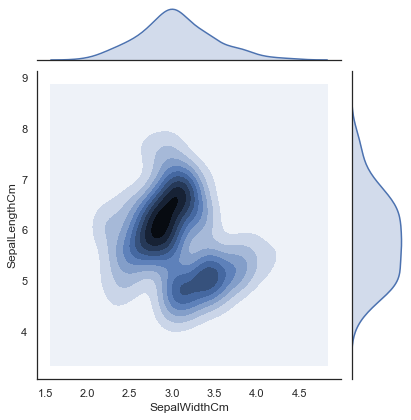

In [120]:
ax = sns.jointplot(x='SepalWidthCm', y='SepalLengthCm', data=dataset, kind='kde', stat_func=None)

### 3.6 Dimension Reduction - PCA

PCA is (truncated) SVD on centered data (by per-feature mean substraction). If the data is already centered, those two classes will do the same.

In practice TruncatedSVD is useful on large sparse datasets which cannot be centered without making the memory usage explode.

Assumes the low variance features are "noise” and high variance features are “informative”.

In [149]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
transformed = pca.transform(df)
pca_features = range(pca.n_components_)



array([9.98701562e-01, 9.33703776e-04, 1.61365121e-04, 9.99313100e-05,
       4.30300729e-05, 2.15315356e-05, 1.63895033e-05, 1.23276129e-05,
       4.00288211e-06, 2.56934442e-06, 1.32969289e-06, 7.28131583e-07,
       6.06438985e-07, 4.78003631e-07, 3.03702295e-07, 4.45595621e-08,
       2.83500202e-08, 2.38793891e-08, 1.45285565e-08, 9.07088386e-09,
       7.75819420e-09, 5.45144426e-09, 3.51856568e-09, 2.86003368e-09,
       8.32849107e-10, 3.51981126e-10, 1.10266218e-10, 7.95371660e-13,
       2.83336337e-32, 9.42859616e-33, 9.42859616e-33, 9.42859616e-33,
       6.52980816e-33])

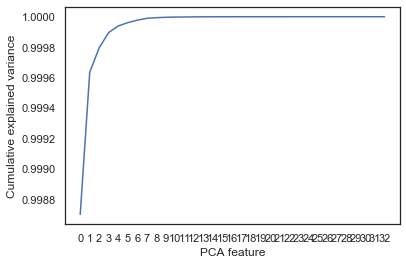

In [155]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
transformed = pca.transform(df)
pca_features = range(pca.n_components_)

# plotting cumulative explained variance
plt.plot(pca_features, pca.explained_variance_ratio_.cumsum())
plt.xticks(pca_features)
plt.ylabel('Cumulative explained variance')
plt.xlabel('PCA feature')
plt.show()


## 4. Clustering: unsupervised ML

There are hierarchical and non-hierarchical clustering methods. We will first talk about hierarchical methods: 

Techniques include K-Means (not to be confused with K-nearest neighbours), DBSCAN (Density-based spatial clustering of applications with noise), OPTICS (which is a generalisation of DBSCAN where $\varepsilon$ is endogenously chosen), and t-SNE (t-distributed stochastic neighbor embedding), and , etc. 



### Intertia

Measures clustering quality:
- Measures how spread out the clusters are (lower is better)
- Distance from each sample to centroid of its cluster
- After .fit(), available as attribute `inertia_`
- k-means attempts to minimize the inertia when choosing clusters


In [17]:
from sklearn.cluster import KMeans

dataset = pd.read_csv('data/Iris.csv')
df = dataset.iloc[:, [1, 2, 3, 4]].values

model = KMeans(n_clusters=3)
model.fit(df)

# 6 significant figures with the g modifier
print("{0:.6g}".format(model.inertia_))


78.9408


### 4.1 K-Means Clustering

Cluster finding initially seekd to find $N$ clusters in a data set and to subsequently identify which data points belong to each cluster. While there are a number of different approaches to clustering, one of the easiest to understand is the k-means algorithm. In this algorithm 

Step 1 - Pick K random points as cluster centers called centroids.<br />
Step 2 - Assign each x_ix i to nearest cluster by calculating its distance to each centroid.<br />
Step 3 - Find new cluster center by taking the average of the assigned points.<br />
Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.<br />

#### Elbow Method

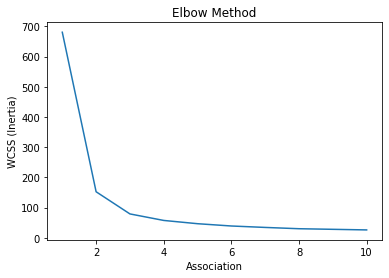

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

dataset = pd.read_csv('data/Iris.csv')
df = dataset.iloc[:, [1, 2, 3, 4]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS (Inertia)') #within cluster sum of squares
plt.show()

In [35]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

dataset = pd.read_csv('./data/Iris.csv')
df = dataset.iloc[:, [1, 2, 3, 4]].values

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)
y_kmeans

# or kmeans.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

The IRIS dataset has three clusters. We use matplotlib.pyplot to plot the clustered datasets. 

`plt.scatter()` has the following params:

As an example, if you want to visualise 3 clusters and have the labels, then do the following: 

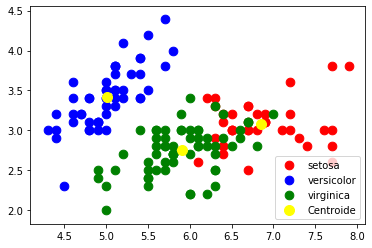

In [33]:
#Visualising the clusters

plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 75, 
            c = 'red', label = 'setosa')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 75, 
            c = 'blue', label = 'versicolor')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 75, 
            c = 'green', label = 'virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 100, 
            c = 'yellow', label = 'Centroide')

plt.legend()

In [38]:
dataset["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [45]:
dataset = pd.read_csv('./data/Iris.csv')
df = dataset.iloc[:, [1, 2, 3, 4]].values

model = KMeans(n_clusters=3)

labels = model.fit_predict(df)
varieties = dataset["Species"].astype('category')

pd.crosstab(labels, varieties)

Species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
0,50,0,0
1,0,48,14
2,0,2,36


#### Silhouette score

`sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, random_state=None, **kwds)`

[Silhouette wiki](https://en.wikipedia.org/wiki/Silhouette_(clustering))

#### K-Means from scratch

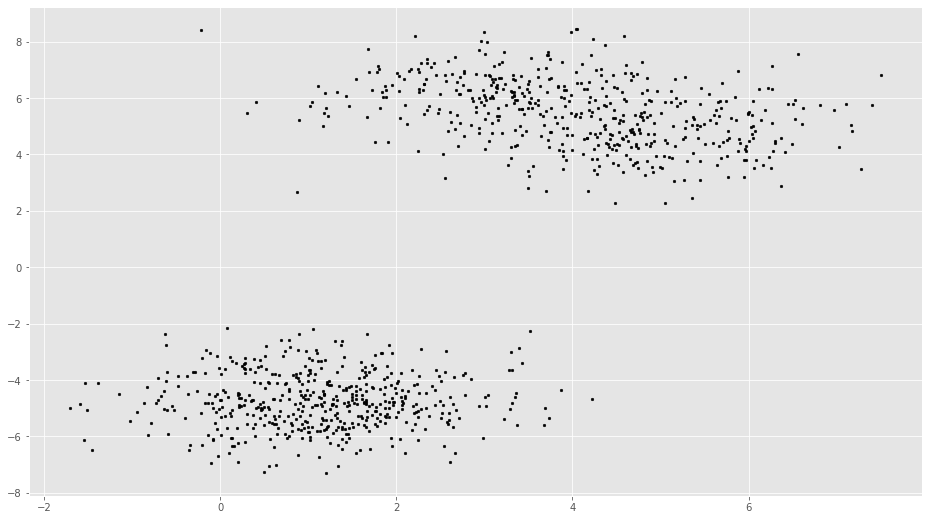

In [82]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importing the dataset
# Creating a sample dataset with 3 clusters
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, n_features=2, centers=4)
x1 = [point[0] for point in X]
x2 = [point[1] for point in X]
plt.scatter(x1, x2, c='black', s=7)

[[ 5.  3.]
 [ 3.  3.]
 [ 2.  1.]
 [ 5. -2.]]


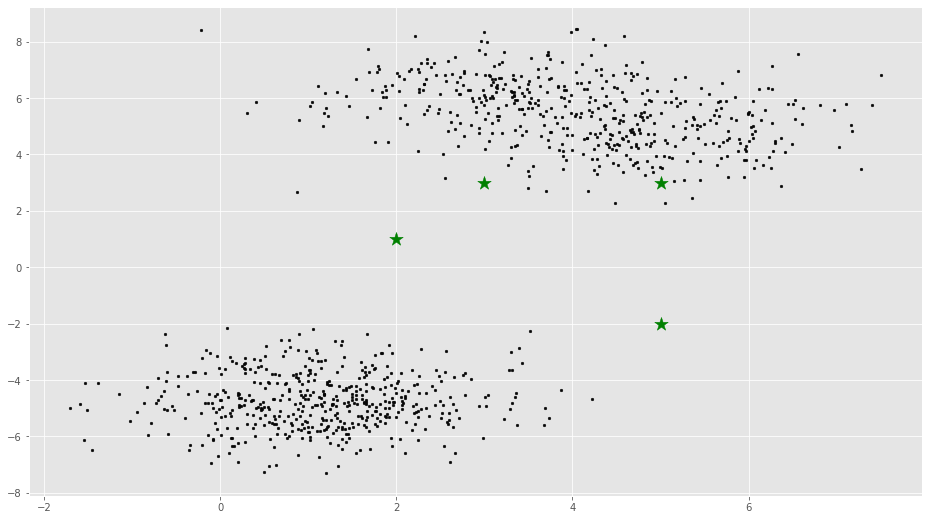

In [83]:
# Euclidean Distance Calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Number of clusters
k = 4
# X coordinates of random centroids
C_x = np.random.randint(np.min(x1)+.5*np.std(x1), np.max(x1)-.5*np.std(x1), size=k)
# Y coordinates of random centroids
C_y = np.random.randint(np.min(x2)+.5*np.std(x2), np.max(x2)-.5*np.std(x2), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

# Plotting along with the Centroids
plt.scatter(x1, x2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [84]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

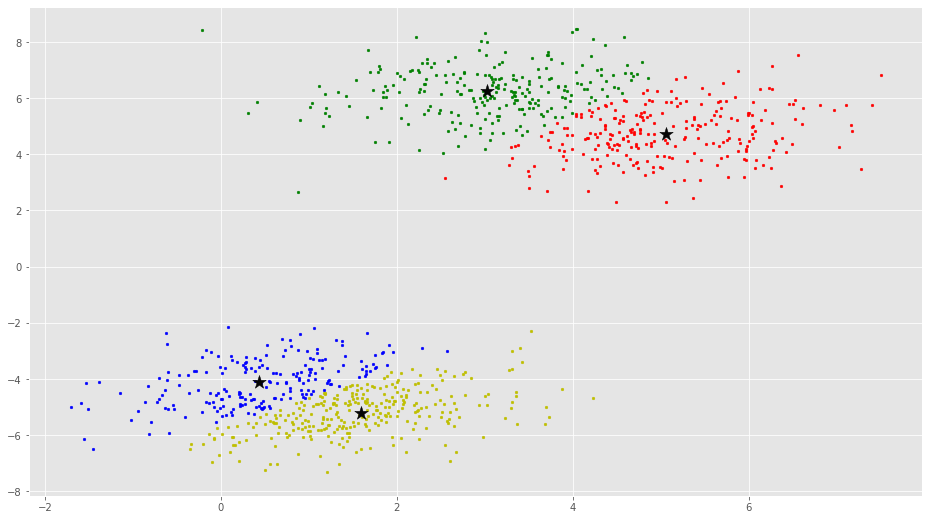

In [85]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [88]:
# Comparing with scikit-learn centroids

from sklearn.cluster import KMeans
# Number of clusters
kmeans = KMeans(n_clusters=k)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

print(C) # From Scratch
print(centroids)

[[ 5.0632915   4.7199135 ]
 [ 3.0279925   6.248644  ]
 [ 0.43604782 -4.088719  ]
 [ 1.5981816  -5.2090178 ]]
[[ 1.78411101 -4.32798892]
 [ 5.06329167  4.71991338]
 [ 0.44175232 -5.19775933]
 [ 3.0279925   6.2486439 ]]


### 4.2 DBSCAN

DBSCAN requires two parameters: ε (eps) and the minimum number of points required to form a dense region (minPts). It starts with an arbitrary starting point that has not been visited. This point's ε-neighborhood is retrieved, and if it contains sufficiently many points, a cluster is started. Otherwise, the point is labeled as noise. Note that this point might later be found in a sufficiently sized ε-environment of a different point and hence be made part of a cluster.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, normalize

df = StandardScaler().fit_transform(df)

dbsc = DBSCAN(eps = 0.05, min_samples = 10)
dbsc.fit(df)
pred_classes = dbsc.labels_

I've written a DBSCAN gridsearch algo:

In [ ]:
from sklearn.cluster import DBSCAN

epss = np.arange(0.2,1,.025)
min_sampless = range(10,30)

for eps in epss:
    for min_samples in min_sampless:
        # eps = .7
        # min_samples= 12
        
        db = DBSCAN(eps=eps, metric="euclidean", min_samples=min_samples)
        db.fit_predict(StandardScaler().fit_transform(samples))
        labels = db.labels_
        if (len(set(labels)) - (1 if -1 in labels else 0)) == 3:
            print("With epsilon =", round(eps,3), "and min_samples =", min_samples, "we have",len(set(db.labels_))-1, "classes and 1 outlier class. There are", list(labels).count(-1), "outlier points.\n") 

eps = .6
min_samples= 11
        
db = DBSCAN(eps=eps, metric="euclidean", min_samples=min_samples)
db.fit_predict(StandardScaler().fit_transform(samples))
print("\nFinal result: \n")
print("With epsilon =", round(eps,3), "and min_samples =", min_samples, "we have",len(set(db.labels_))-1, "classes and 1 outlier class. There are", list(labels).count(-1), "outlier points.\n") 
pg = plot_pair(samples, db.labels_.reshape((150,1)))


### 4.3 t-SNE - t-distributed stochastic neighbor embedding

- Maps samples to 2D space (or 3D)
- Map approximately preserves nearness of samples
- Great for inspecting datasets

**t-SNE has only .fit_transform()!!** Can’t extend the map to include new data samples.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs, ys, c=species)
plt.show()


### 4.4 Hierarchical Clustering

Every data point begins in a separate cluster. 

- At each step, the two closest clusters are merged
- Continue until all cities in a single cluster
- This is “agglomerative” hierarchical clustering (the other type is “divisive”)

There are four main methods:  
methods = ["single", "average", "complete", "weighted"]



In [ ]:
# Dendrograms

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(df, method='complete')
dendrogram(mergings,
		labels=cluster_names,
		leaf_rotation=90,
		leaf_font_size=6)
plt.show()


In [ ]:
# Extracting cluster labels

from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method='complete')
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 10, criterion='distance')
print(labels)


As an example with the firm data:



Method: single


<Figure size 1080x864 with 0 Axes>

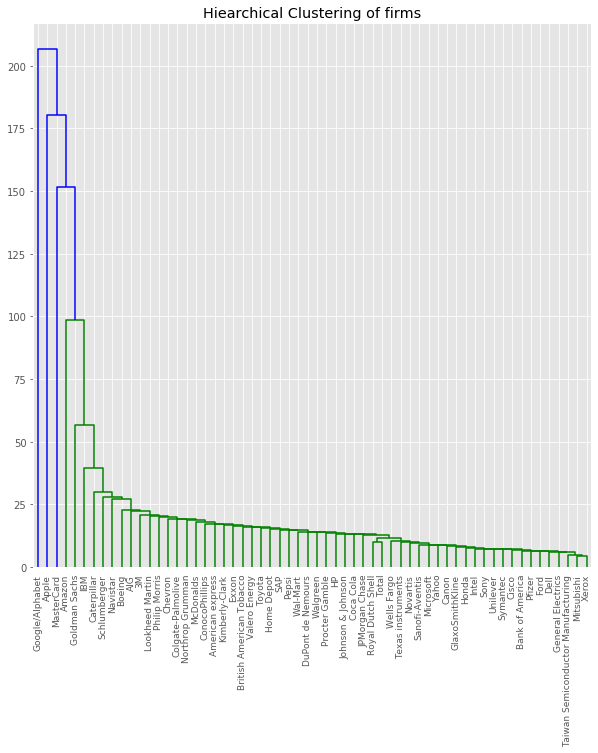


Method: average


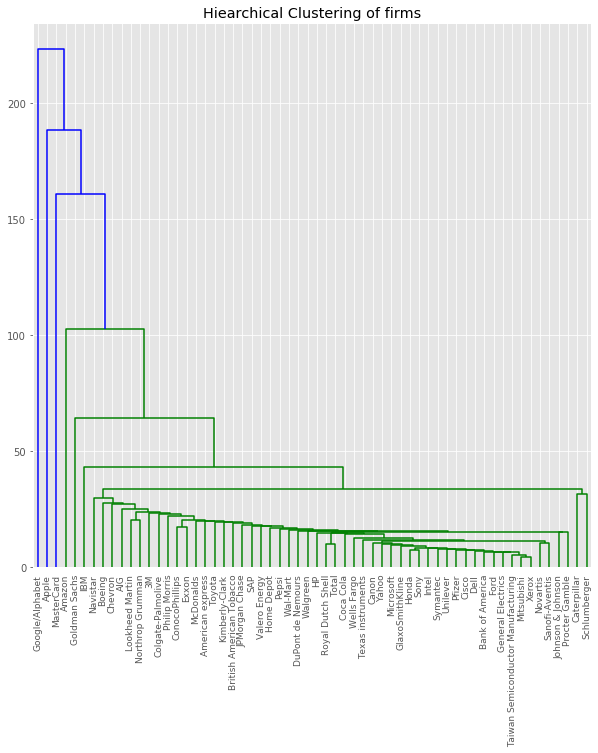


Method: complete


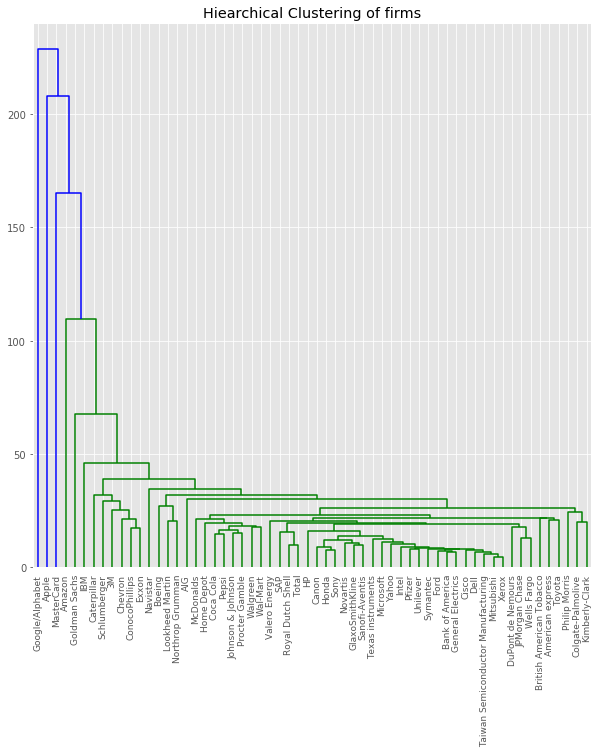


Method: weighted


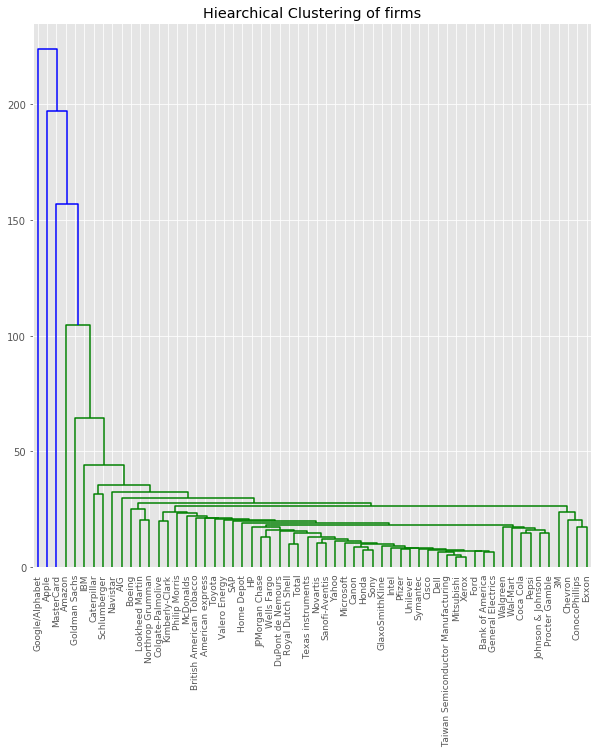

In [94]:
from scipy.cluster.hierarchy import linkage, dendrogram
mvmt = pd.read_csv("./data/movements.csv", header=None, index_col=False, skiprows=1, usecols=range(0,964))
data = mvmt.iloc[:,1:].values
firms = mvmt.iloc[:,0].values
plt.figure(figsize=(15,12))

methods = ["single", "average", "complete", "weighted"]

for method in methods:
    mergings = linkage(data, method = method)
    plt.figure(figsize=(10,10))
    dendrogram(mergings,
               labels=firms,
               leaf_rotation=90,
               leaf_font_size=9,
    )
    plt.title("Hiearchical Clustering of firms")
    print("\nMethod:", method)
    plt.show()


### 4.5 Summary: Clustering methods

Strengths of K-Means
- Simple:  -  Easy  to  understand  and  to implement. 
- Efficient:  Time  complexity:  O(t*k*n), where  n is the number of data points,   k is the number  of clusters,  and t  is  the  number  of iterations. 
- Since  both  k  and  t  are  small.  k-Means  is considered a linear algorithm 

Weakness of K-Means
- The algorithm is only  applicable  if the mean is defined. 
- The user needs to specify k.
- Sensitive to outliers and not good at clustering samples which are not hyper-ellipsoids /spheres

Strengths of HC
- Conceptually Simple
- Theoretical properties are well understood.
- When  Clusters  are  merged  /split,  the decision  is  permanent  =>  the  number  of different  alternatives  that  need  to  be examined is reduced 

Weakness of HC
- Merging  /splitting of  clusters  is permanent =>  Erroneous  decisions  are  impossible  to correct later. 
- Divisive  methods  can  be  computational hard. 
- Methods  are  not  (necessarily)  scalable  for large datasets. There is no mathematical objective for Hierarchical clustering. All the approaches to calculate the similarity between clusters has its own disadvantages. High space and time complexity for Hierarchical clustering. Hence this clustering algorithm cannot be used when we have huge data.


## 5. Supervised Data Mining

There are three parts to this: classification, regression, and data generation. 

Here are some definitons: 

- Underfitting: the model is too simple with low *training* accuracy
- Overfitting: the model is too complex with low *test* accuracy

- **precision** (also called positive predictive value) is the fraction of relevant instances among the retrieved instances
- **recall** (also known as sensitivity) is the fraction of relevant instances that have been retrieved over the total amount of relevant instances. 

Both precision and recall are therefore based on an understanding and measure of relevance. `recall=36/62` which is stating that model is 58% sensitive to predict diabetes from patients which actually have diabetes. 

**Receiver Operating Characteristic(ROC)** curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity. 1 is good, perfect classification. 0.5 is worthless.

### 5.1 Logistic Regression

Because our prediction function is non-linear (due to sigmoid transform), squaring this prediction as we do in MSE results in a non-convex function with many local minimums. If our cost function has many local minimums, optimization algorithm (i.e. gradient descent) may not find the optimal global minimum.

#### Advantages
Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

#### Disadvantages
Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.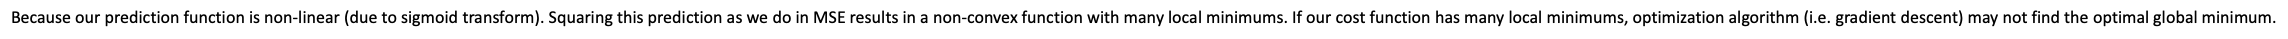

In [123]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("./data/diabetes.csv", header=0, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [124]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima["label"] # Target variable

In [127]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X ,y, test_size=0.25, random_state=0)

In [128]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# fit the model with X_train, y_train, and predict on X_test
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [129]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

Text(0.5, 257.44, 'Predicted label')

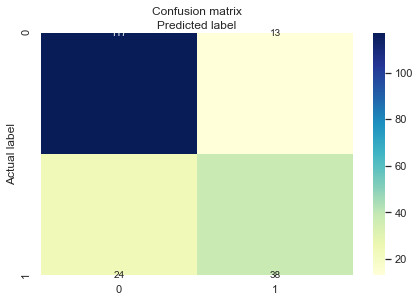

In [130]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [131]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


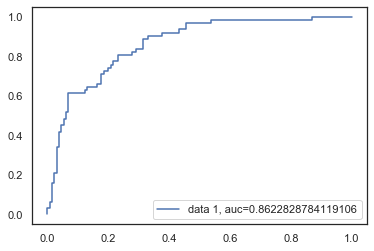

In [132]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 5.2 Support Vector Machines

SVM's map points in the data space so that categories are divided by a clear gap that is as wide as possible. SVMs can efficiently perform a non-linear classification using what is called the "kernel trick", implicitly mapping their inputs into high-dimensional feature spaces.

## 99. NLP

Word embedding is the collective name for a set of language modelling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. 

There are three main methods: Count Vectorizer, TF-IDF Vectorizer, and Word2Vec. 


In [96]:
corpus = [
'This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?',
]

### 99.1 Count Vectorizer

`sklearn.feature_extraction.text.CountVectorizer` converts a collection of text documents to a matrix of token counts. This implementation produces a sparse representation of the counts using `scipy.sparse.csr_matrix`.
 

In [98]:
from sklearn.feature_extraction.text import CountVectorizer 

# vectorising each word
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

# vectorising two word combos
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names())
print(X2.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and this', 'document is', 'first document', 'is the', 'is this', 'second document', 'the first', 'the second', 'the third', 'third one', 'this document', 'this is', 'this the']
[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


### 99.2 TF-IDF Vectoriser 

While Count Vectorizer converts each sentence into its own vector, it does not consider the importance of a word across the complete list of sentences. For example, `He` is in two sentences and it provides no useful information in differentiating between the two. Thus, it should have a lower weight in the overall vector of the sentence. This is where the TF-IDF Vectorizer comes into the picture.

TF-IDF is a product of two parts:

1.	TF (Term Frequency) — It is defined as the number of times a word appears in the given sentence.
2.	IDF (Inverse Document Frequency) — It is defined as the log to the base e of number of the total documents divided by the documents in which the word appears.

The algo works as follows: 
1. Identify unique words in complete text data
2. For each sentence, create an array of zeros with the same length as the number of unique words. 
3. For each word in each sentence, calculate TF-IDF value and update the elements in the array. 

`sklearn.feature_extraction.text.TfidfVectorizer` converts a collection of raw documents to a matrix of TF-IDF features. It is equivalent to `CountVectorizer` followed by `TfidfTransformer`.

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483


### 99.3 Word2Vec

These are a set of neural network models that have the aim to represent words in the vector space. These models are highly efficient and performant in understanding the context and relation between words. Similar words are placed close together in the vector space while dissimilar words are placed wide apart.
It is so amazing to represent words that it is even able to identify key relationships such that:
King - Man + Woman = Queen
It is able to decipher that what a Man is to a King, a Woman is to a Queen. The respective relationships could be identified through these models.
There are two models in this class:
1.	CBOW (Continuous Bag of Words): The neural network takes a look at the surrounding words (say 2 to the left and 2 to the right) and predicts the word that comes in between
2.	Skip-grams: The neural network takes in a word and then tries to predict the surrounding words
The neural network has one input layer, 1 hidden layer and 1 output layer to train on the data and build the vectors. As it’s the basic functionality on how a neural network works, I’ll skip the step by step process.


In [ ]:
from gensim.models import Word2Vec